## Урок 2. 

# Анализ данных и проверка статистических гипотез.

**План занятия**

* [Теоретическая часть](#theory)
    * [Теория вероятностей и математическая статистика](#prob_theory_and_math_stat)
    * [Что такое статистическая гипотеза?](#stat_hypothesis)
    * [Проверка статистических гипотез](#stat_hypothesis_test)
    * [Критерий Шапиро-Уилка](#shapiro_criterion)
    * [Критерий Стьюдента (t-test), двухвыборочный](#student_criterion)
    * [Критерий хи-квадрат (критерий согласия Пирсона)](#pirson_criterion)
    * [Доверительные интервалы](#conf_interval)
* [Практическая часть](#practice)
    * [Загрузка данных](#load_data)
    * [Анализ целевой переменной](#target_analysis)
    * [Анализ признакового пространства](#features_analysis)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

### Теория вероятностей и математическая статистика<a class="anchor" id="prob_theory_and_math_stat">

**Теория вероятностей** изучает модели случайных величин и свойства этих моделей.

**Математическая статистика и анализ данных** пытаются по свойствам конечных выборок определить свойства случайной величины, чтобы понять, как она будет вести себя в будущем.

### Что такое статистическая гипотеза?<a class="anchor" id="stat_hypothesis"></a>

**Статистическая гипотеза** - предположение о виде распределения и свойствах случайной величины, которое можно подтвердить или опровергнуть применением статистических методов к данным выборки.

**Нулевая гипотеза** - некоторое, принимаемое по-умолчанию предположение, о том, что не существует связи между двумя наблюдаемыми событиями, отклонения показателей и других неожиданных результатов, словом нет никакого эффекта.

**Альтернативная гипотеза** - в качестве альтернативы, как правило, выступает проверяемое предположение, но также бывает, что альтернатива не задана явно, в этом случаем рассматривают отрицание утверждение, заданного в нулевой гипотезе.

**Проверка статистической гипотезы** - это процесс принятия решения о том, противоречит ли рассматриваемая статистическая гипотеза наблюдаемой выборке данных.

**Статистический тест или статистический критерий** - строгое математическое правило, по которому принимается или отвергается статистическая гипотеза.

**Пример формализованного описания гипотезы**

$\large x^n = (x_1, .. , x_n), \: x^n \in X, \: X \sim P$<br>
$\large H_0: \: P \in \omega$<br>
$\large H_1: \: P \notin \omega$<br>
$\large T(x^n), \: T(x^n) \sim F_0(t) \: | \: H_0, \: T(x^n) \nsim F_0(t) \: | \: H_1$<br>

$\normalsize H_0$ - нулевая гипотеза<br>
$\normalsize H_1$ - альтернативная гипотеза<br>
$\normalsize X$ - случайная величина<br>
$\normalsize x^n$ - выборка размера $n$ из случайной величины $X$<br>
$\normalsize P$ - некоторое распределение случайной величины $X$<br>
$\normalsize \omega$ - некоторое семейство распределений<br>
$\normalsize T(x^n)$ - статистика от выборки $x^n$<br>
$\normalsize F_0(t)$ - нулевое распределение статистики<br>

В данном примере проверяется гипотеза $\normalsize H_0$ о том, что распределение $\normalsize P$ случайной величины $\normalsize X$, принадлежит некоторому семейству распределений, которое определёно нами заранее, допустим это семейство нормальных распределений. В качестве альтернативы выступает гипотеза $\normalsize H_1$, утверждающая, что распределение $\normalsize P$ принадлежит какому то иному семейству распределений.

Статистика $\normalsize T(x^n)$ и её нулевое распределение $\normalsize F_0(t)$ образуют *статистический критерий*.

### Проверка статистических гипотез<a class="anchor" id="stat_hypothesis_test"></a>

**Методика проверки статистических гипотез**

1. Cформулировать гипотезы $\normalsize H_0$ и $\normalsize H_1$
2. Выбрать подходящий статистический критерий, исходя из сформулированных гипотез, размера выборки(ок) и т.д.
3. Зафиксировать уровень значимости $\normalsize \alpha$
4. На множестве значений выбранной статистики $\normalsize T$ определить критическую область $\normalsize \Omega_\alpha$ наименее вероятных значений, таких, что $\normalsize P(T \in \Omega_\alpha | H_0) = \alpha$, как правило, рассматривается двусторонняя критическая область: 
$\normalsize (-\infty;x_{\alpha/2}) \cup (x_{1 - \alpha/2};+\infty)$
5. Рассчитать значение статистики $\normalsize T$ и достигаемые уровень значимости $\normalsize p-value^* = P(T \ge t \: | \: H_0)$
6. Если $\normalsize p-value < \alpha$, $\normalsize H_0$ отвергается в пользу $\normalsize H_1$, т.к вероятность получить такие данные (выборку), при верности $\normalsize H_0$, крайне мала.


* достигаемый уровень значимости, p-value* - это вероятность, при справедливости нулевой гипотезы, получить такое же распределение статистики, как в эксперименте, или ещё более экстремальное.


**Ошибки первого и второго рода**

Ошибка первого рода — когда нулевая гипотеза отвергается, хотя на самом деле она верна.<br>
Ошибка второго рода — когда нулевая гипотеза принимается, хотя на самом деле она не верна.<br>

|$H_0$             |**верная**                                    |**ложная**                                 |
|:----------------:|:--------------------------------------------:|:-----------------------------------------:|
|**принимается**   |$H_0$ верно принята                           |$H_0$ неверно принята (ошибка второго рода)|
|**отклоняется**   |$H_0$ неверно отвергнута (ошибка первого рода)|$H_0$ верно отвергнута                     |

В механизме проверки гипотез ошибки первого и второго рода неравнозначны, ошибка первого рода критичнее, любой корректный статистический критерий должен обеспечивать вероятность ошибки первого рода не больше, чем $\normalsize \alpha$,<br>
$\normalsize P(H_0 \: отвергнута \: | \: H_0) = P (p \le \alpha \: | \: H_0) \le \alpha$

Ошибка второго рода связана с понятием мощности статистического критерия,<br>
$\normalsize pow = P(H_0 \: отвергнута \: | \: H_1) = 1 - P(H_0 \: принята \: | \: H_1)$ - вероятность отклонить нулевую гипотезу, при верности альтернативы.

### Критерий Шапиро-Уилка<a class="anchor" id="shapiro_criterion"></a>

Данный критерий проверяет гипотезу о том, что некоторая случайная величина имеет нормальное распределение (распределение Гаусса). Необходимость проверять случайную величину на "нормальность", обусловлена тем, что многие статистические критерии и  аналитические методы из мат. статистики ориентированы на выборки из нормально распределённых случайных вечличин и перед их использование необходимо убедиться в том, что закон распределния приближен к нормальному.

Помимо этого нормально распределённые случайные величины обладают некоторыми полезными свойствами, которые могут быть полезны в процессе работы с ними.

**Нормальное распределение**

<img src="normal_distr.png">

**Формализованное описание**

$\large x^n = (x_1, .. , x_n), \: x^n \in X$<br>

$\large H_0: \: X \sim N(\mu, \sigma^2)$<br>
$\large H_1: \: H_0 \: неверна$<br>

$\large W(x^n) = \frac{(\sum_{i=1}^n a_i x_i)^2}{\sum_{i=1}^n (x_i - \bar{x})^2} $<br>

Нулевое распределение статистики - табличное.

### Критерий Стьюдента (t-test), двухвыборочный<a class="anchor" id="student_criterion"></a>

Критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента.<br> Наиболее часто данные критерии применяются для проверки равенства средних значений (мат. ожиданий) в двух выборках.

**Формализованное описание**

$\large x_1^{n_1} = (x_{11}, .. , x_{1{n_1}}), \: x_1^{n_1} \in X_1, \: X_1 \sim N(\mu_1, \sigma_1^2), \sigma_1 неизвестна$<br>
$\large x_2^{n_2} = (x_{21}, .. , x_{2{n_1}}), \: x_2^{n_2} \in X_2, \: X_2 \sim N(\mu_2, \sigma_2^2), \sigma_2 неизвестна$<br>

$\large H_0: \: \mu_1 = \mu_2$<br>
$\large H_1: \: \mu_1 <\ne> \mu_2$<br>

$\large T(x_1^{n_1}, x_2^{n_2}) = \frac{\bar{x_1} \: - \: \bar{x_2}}{\sqrt{\frac{S_1^2}{n_1} - \frac{S_2^2}{n_2}}}$<br>
$\large T(x_1^{n_1}, x_2^{n_2}) \sim St$

**Условия применения**

* нормальное распределение, отсутствие выбросов
* размер выборки не меньше 30 наблюдений

Если данные не отвечают этим критериям, то применяется *U критерий Манна-Уитни* - это непараметрический тест, в котором для расчета используются не исходные данные, а их ранговые позиции. 

Если групп больше двух, подойдет *критерий Краскела-Уоллиса*.

Если выборок две и они зависимые применяется ранговый Т-критерий Уилкоксона.

### Критерий хи-квадрат (критерий согласия Пирсона)<a class="anchor" id="pirson_criterion"></a>

Критерий хи-квадрат позволяет оценить значимость различий между фактическим (выявленным в результате исследования) количеством исходов и теоретическим количеством, которое можно ожидать в изучаемых группах при справедливости нулевой гипотезы. Выражаясь проще, метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей).

**Формализованное описание**

$\large x^n = (x_1, .. , x_n), \: x^n \in X$<br>

$\large H_0: \: Эмпирические \: (наблюдаемые) \: и \: теоретические \: (ожидаемые) \: частоты \: согласованы$ <br>
$\large H_1: \: H_0 \: неверна$<br>

$\large \chi^2(x^n) = \sum_{i=1}^K \frac{(O_i - E_i)^2}{E_i}$<br>
$O$ (Observed) - наблюдаемые частоты<br> 
$E$ (Expected) - ожидаемые частоты<br>
$K$ - количество оцениваемых частот

$\large \chi^2(x^n) \sim \chi^2$

**Условия применения**

Сопоставляемые группы должны быть независимыми, то есть критерий хи-квадрат не должен применяться при сравнении наблюдений "до-после" или связанных пар. Аналог для зависимых выборок - *тест Мак-Немара* или *Q-критерий Кохрена* для сравнения трех и более групп.

Если в ячейке меньше 10 наблюдений, применяется *поправка Йетса*. 

Если меньше 5, то вместо хи-квадрат используется *точный тест Фишера*.

### Доверительные интервалы<a class="anchor" id="conf_interval"></a>

Вид интервальной оценки, которая задаёт числовые границы, в которых, с определённой вероятностью, находится истинное значение оцениваемого параметра.

**Порядок расчета доверительного интервала (для мат. ожидания)**

1. Задать уровень достоверности (confidence level), $\normalsize \alpha = 95\% = 0.95$
2. Найдите по таблице Z-оценок или рассчитать коэффициент достоверности (confidence coefficient) - $\normalsize Z_{\alpha/2}$, для $\normalsize \alpha = 0.95, Z_{\alpha/2} = 1.96$ (это 97.5 перцентиль нормального распределения)
3. Рассчитать доверительный интервал (confidence interval), $\normalsize CI = \bar{x} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$,<br>
где $\normalsize \bar{x}$ - выборочное среднее, $\normalsize \sigma$ - стандартное отклонение, $\normalsize n$ - размер выборки

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

**Пути к директориям и файлам**

In [3]:
DATASET_PATH = '../data/training_project_data.csv'
PREP_DATASET_PATH = '../data/training_project_data_prep.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

**Описание базового датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замуженм, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

In [4]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


**Выделение целевой переменной и групп признаков**

In [5]:
TARGET_NAME = 'NEXT_MONTH_DEFAULT'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

### Анализ целевой переменной<a class="anchor" id="target_analysis"></a>

**Обзор распределения**

In [6]:
df[TARGET_NAME].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

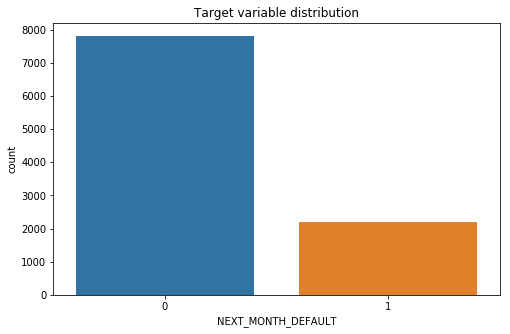

In [7]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

**Корреляция с базовыми признаками**

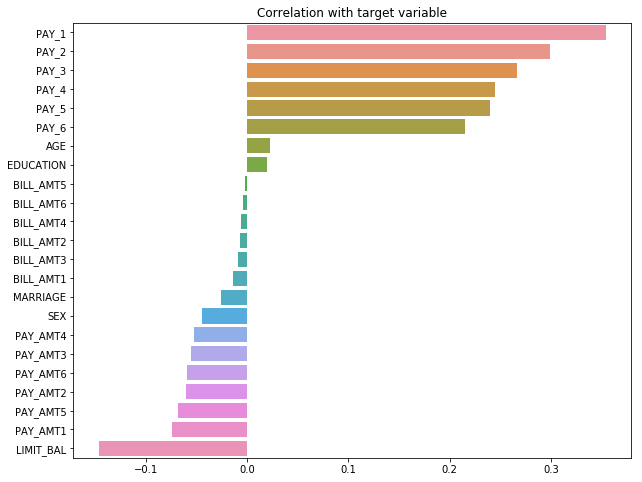

In [8]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "PAY_1" в разрезе целевой переменной**

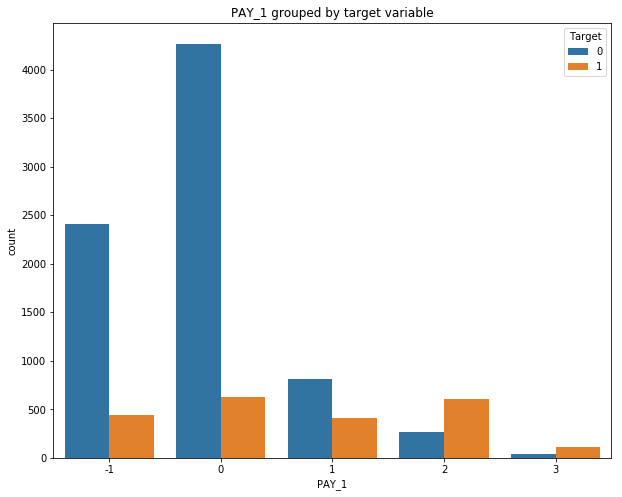

In [9]:
plt.figure(figsize=(10, 8))

sns.countplot(x="PAY_1", hue=TARGET_NAME, data=df)
plt.title('PAY_1 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

**Наблюдение**

Изучив получившийся график, видно, что значения -1 (погашен полностью) и 0 (погашен частично) признака PAY_1 имеют схожие доли в разрезе целевой переменной. Если это действительно так, то можно будет, например, объединить их в одну категорию.

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо подать наблюдаемые частоты категорий -1 и 0 признака PAY_1 в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

*Сформируем выборку и рассчитаем наблюдаемые частоты*

In [10]:
pay1_and_target_s = df.loc[df['PAY_1'].isin([-1, 0]), ['ID', 'PAY_1', 'NEXT_MONTH_DEFAULT']]

In [11]:
table = pay1_and_target_s.pivot_table(values='ID', index='PAY_1', columns='NEXT_MONTH_DEFAULT', aggfunc='count')
table

NEXT_MONTH_DEFAULT,0,1
PAY_1,,
-1,2413,439
0,4266,629


In [12]:
(table[1] / table[0]).values

array([0.18193121, 0.14744491])

*Проверим нашу гипотезу используя критерий Хи-квадрат Пирсона*

In [13]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.0017414401548668454

P-value получилось __меньше__ выбранного уровня значимости, соответственно у нас есть основания для отвержения нулевой гипотезы и можно утверждать, что категории -1 (погашен полностью) и 0 (погашен частично) в разной степени влияют на целевую переменную и их нельзя объединить в одну категорию

* Для других признаков, например, пары PAY_2 и PAY_3, можно провести аналогичный анализ и после этого решать о целесообразности изменения категорий или построения новых признаков.

**Оценка признака "LIMIT_BAL" в разрезе целевой переменной**

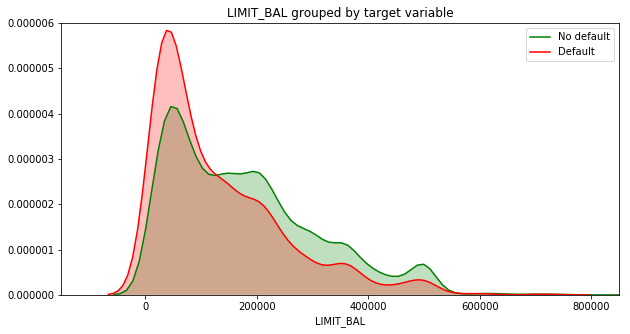

In [14]:
limit_bal_with_target_s = df[['LIMIT_BAL', TARGET_NAME]]
limit_bal_s = limit_bal_with_target_s['LIMIT_BAL']
limit_bal_target_0 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')

plt.xlabel('LIMIT_BAL')
plt.title('LIMIT_BAL grouped by target variable')
plt.xlim(-150000,850000)
plt.ylim(0, 6e-6)
plt.show()

**Наблюдение**

Похоже что две группы, полученные в результате разбиения признака "LIMIT_BAL" по целевой переменной, имеют различные распределения, что может помочь при построение модели, т.к. это будет означать, что между признаком "LIMIT_BAL" и целевой переменной, возможно, существует некоторая функциональная зависимость.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух независимых выборках равны
* Альтернативная гипотеза: средние значения в двух независимых выборках различаются
* Критерий: критерий Стьюдента (t-тест) и его аналоги
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений.
Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, буде менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

In [15]:
shapiro(limit_bal_s)

(0.907916247844696, 0.0)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

*Для достоверности произведём визуальную оценку распределения признака, а так же построим QQ-график*

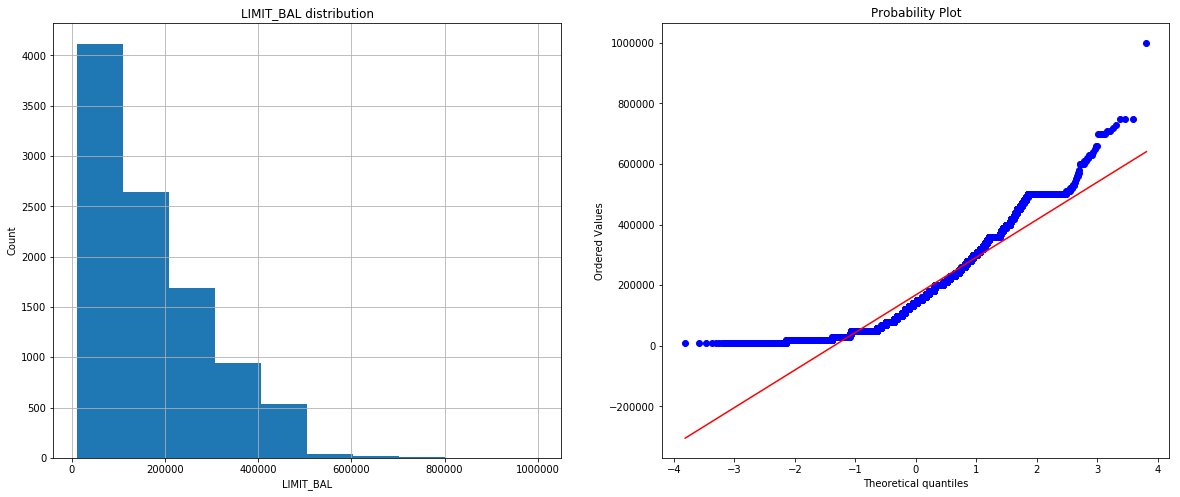

In [16]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('LIMIT_BAL')
ax1.set_ylabel('Count')
ax1.set_title('LIMIT_BAL distribution')
limit_bal_s.hist()

plt.subplot(122)
probplot(limit_bal_s, dist='norm', plot=plt)

plt.show()

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака LIMIT_BAL в группах с просроченным и непросроченным платежом в следующем месяце, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

*Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни*

In [17]:
mannwhitneyu(limit_bal_target_0, limit_bal_target_1)

MannwhitneyuResult(statistic=6614519.0, pvalue=2.0756208080867333e-60)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

*Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их*

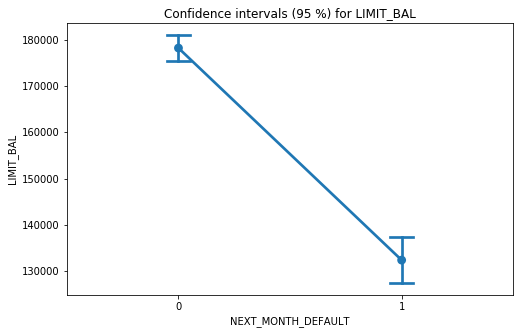

In [18]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='LIMIT_BAL', data=limit_bal_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for LIMIT_BAL')
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

### Анализ признакового пространства<a class="anchor" id="features_analysis"></a>

**Матрица корреляций**

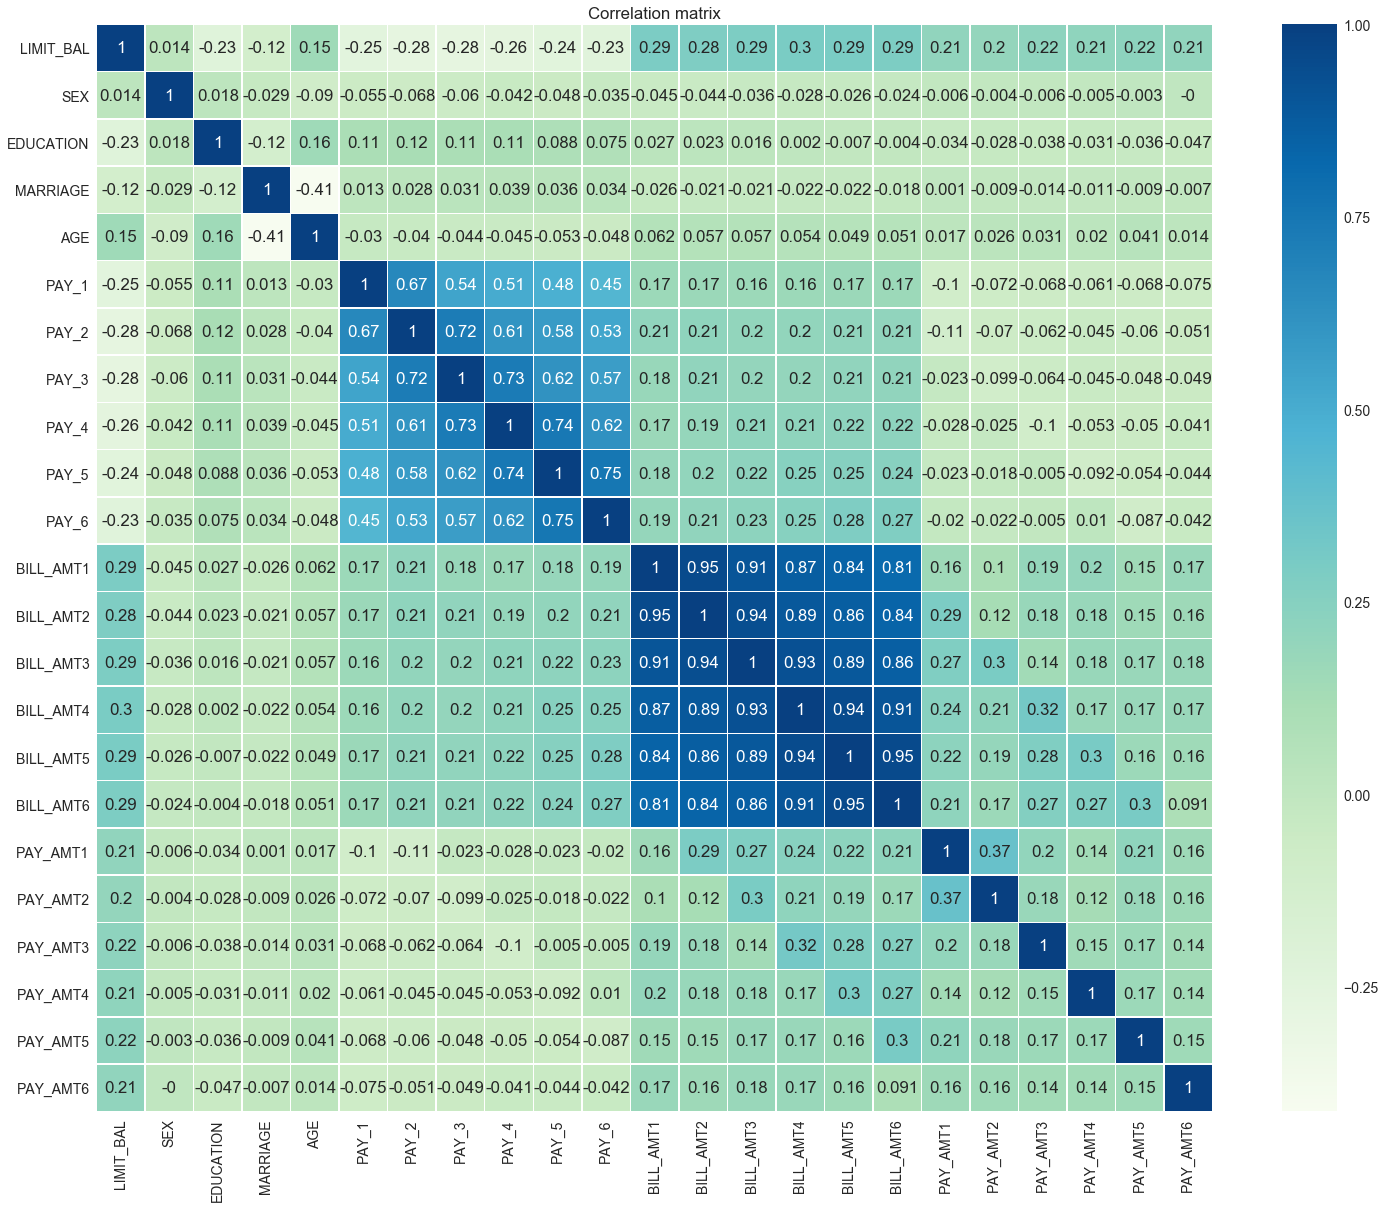

CPU times: user 2.16 s, sys: 105 ms, total: 2.27 s
Wall time: 2.35 s


In [19]:
%%time
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()